In [1]:
# HIDDEN
import matplotlib
#matplotlib.use('Agg')
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy.stats as stats
plt.style.use('fivethirtyeight')

In [2]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

In [3]:
""" REDONE STUFF"""

def distance(pt1, pt2):
    return np.sqrt(np.sum((pt1 - pt2)**2))

def distance_from_individual(attribute_table, i, p):
    """Need to explain .row,
    and that we can make it an array here as it's all numerical"""
    return distance(np.array(attribute_table.row(i)), p)

def table_with_dists2(training, p):
    """Redone to resemble other such code in the course."""
    dists = make_array()
    attributes = training.drop('Class')
    for i in np.arange(training.num_rows):
        dists = np.append(dists, distance_from_individual(attributes, i , p))
    return training.with_column('Distance', dists)

def closest(training, p, k):
    with_dists = table_with_dists2(training, p)
    sorted_by_dist = with_dists.sort('Distance')
    topk = sorted_by_dist.take(np.arange(k))
    return topk

def majority(topkclasses):
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, p, k):
    closestk = closest(training, p, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

In [4]:
ckd = Table.read_table('ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1
68,80,1.01,3,2,normal,abnormal,present,present,157,90,4.1,130,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,1
61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,148,3.9,135,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
48,80,1.025,4,0,normal,abnormal,notpresent,notpresent,95,163,7.7,136,3.8,9.8,32,6900,3.4,yes,no,no,good,no,yes,1
69,70,1.01,3,4,normal,abnormal,notpresent,notpresent,264,87,2.7,130,4,12.5,37,9600,4.1,yes,yes,yes,good,yes,no,1
73,70,1.005,0,0,normal,normal,notpresent,notpresent,70,32,0.9,125,4,10,29,18900,3.5,yes,yes,no,good,yes,no,1
73,80,1.02,2,0,abnormal,abnormal,notpresent,notpresent,253,142,4.6,138,5.8,10.5,33,7200,4.3,yes,yes,yes,good,no,no,1
46,60,1.01,1,0,normal,normal,notpresent,notpresent,163,92,3.3,141,4,9.8,28,14600,3.2,yes,yes,no,good,no,no,1


In [5]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)

In [6]:
ckd_su = Table().with_columns(
    'Hemoglobin', standard_units(ckd.column('Hemoglobin')),
    'Glucose', standard_units(ckd.column('Glucose')),
    'White Blood Cell Count', standard_units(ckd.column('White Blood Cell Count')),
    'Class', ckd.column('Class')
)

In [7]:
ckd_su

Hemoglobin,Glucose,White Blood Cell Count,Class
-0.865744,-0.221549,-0.569768,1
-1.45745,-0.947597,1.16268,1
-1.00497,3.84123,-1.27558,1
-2.81488,0.396364,0.809777,1
-2.08395,0.643529,0.232293,1
-1.35303,-0.561402,-0.505603,1
-0.413266,2.04928,0.360623,1
-1.28342,-0.947597,3.34429,1
-1.10939,1.87936,-0.409356,1
-1.35303,0.489051,1.96475,1


In [8]:
ckd_new = ckd_su.join('Class', color_table)

In [9]:
ckd_new

Class,Hemoglobin,Glucose,White Blood Cell Count,Color
0,0.456884,0.133751,0.617283,gold
0,1.153,-0.947597,0.424788,gold
0,0.770138,-0.762223,0.200211,gold
0,0.596108,-0.190654,-0.73018,gold
0,-0.239236,-0.49961,-0.0564489,gold
0,-0.0304002,-0.159758,0.232293,gold
0,0.282854,-0.00527964,0.71353,gold
0,0.108824,-0.623193,0.200211,gold
0,0.0740178,-0.515058,-0.0243664,gold
0,0.83975,-0.422371,-1.33975,gold


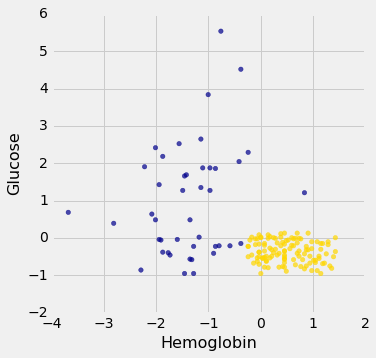

In [10]:
ckd_new.scatter('Hemoglobin', 'Glucose', colors='Color')

### Closest Point ###

In [56]:
def show_closest(point):
    """point = [x,y] 
    gives the coordinates of a new point
    shown in red"""
    
    HemoGl = ckd_new.drop('White Blood Cell Count', 'Color')
    t = closest(HemoGl, point, 1)
    x_closest = t.row(0)[1]
    y_closest = t.row(0)[2]
    ckd_new.scatter('Hemoglobin', 'Glucose', colors='Color')
    plt.scatter(point[0], point[1], color='red', s=30)
    plt.plot([point[0], x_closest], [point[1], y_closest], color='k', lw=2);

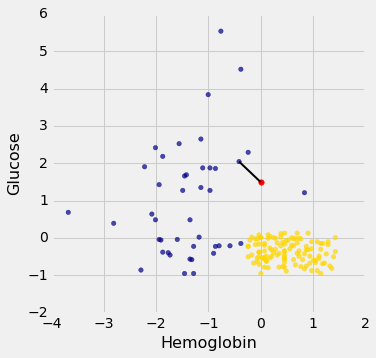

In [77]:
show_closest(make_array(0, 1.5))

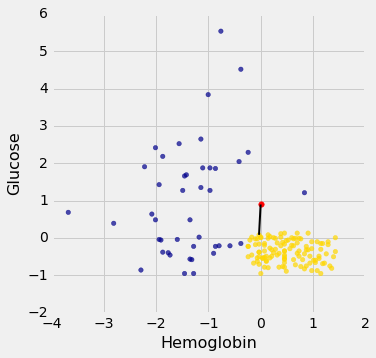

In [81]:
show_closest(make_array(0, 0.9))

### Decision boundary ###

In [36]:
x_array = make_array()
y_array = make_array()
for x in np.arange(-2, 2.1, 0.1):
    for y in np.arange(-2, 2.1, 0.1):
        x_array = np.append(x_array, x)
        y_array = np.append(y_array, y)

In [22]:
def classify_grid(training, test, k):
    c = make_array()
    for i in range(test.num_rows):
        # Run the classifier on the ith patient in the test set
        c = np.append(c, classify(training, make_array(test.row(i)), k))   
    return c

In [46]:
test_grid = Table().with_columns(
    'Hemoglobin', x_array,
    'Glucose', y_array
)

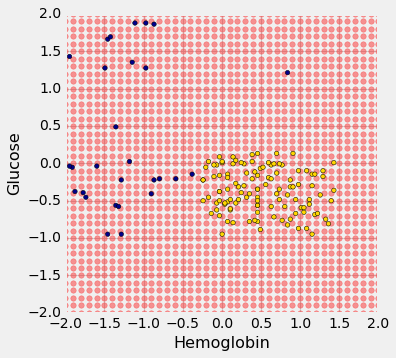

In [62]:
test_grid.scatter('Hemoglobin', 'Glucose', color='red', alpha=0.4, s=30)

plt.scatter(ckd_new.column('Hemoglobin'), ckd_new.column('Glucose'), c=ckd_new.column('Color'), edgecolor='k')

plt.xlim(-2, 2)
plt.ylim(-2, 2);

In [52]:
c = classify_grid(ckd_new.drop('White Blood Cell Count', 'Color'), test_grid, 1)

In [60]:
test_grid = test_grid.with_column('Class', c).join('Class', color_table)

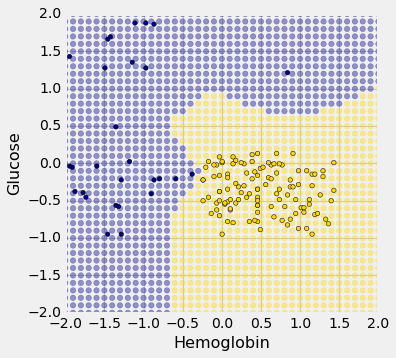

In [63]:
test_grid.scatter('Hemoglobin', 'Glucose', colors='Color', alpha=0.4, s=30)

plt.scatter(ckd_new.column('Hemoglobin'), ckd_new.column('Glucose'), c=ckd_new.column('Color'), edgecolor='k')

plt.xlim(-2, 2)
plt.ylim(-2, 2);